# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 601


--------------

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={'metric'}&q= {city}"
    city_url = f"{url}appid={weather_api_key}&units={'metric'}&q= {city}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
    
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds =  city_weather['clouds']['all']
        city_wind =  city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto ayora
Processing Record 2 of Set 1 | kani keli
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | vorgashor
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | farasan
Processing Record 7 of Set 1 | iqaluit
Processing Record 8 of Set 1 | tete
Processing Record 9 of Set 1 | colonia
Processing Record 10 of Set 1 | sanica
Processing Record 11 of Set 1 | yellowknife
Processing Record 12 of Set 1 | midvagur
Processing Record 13 of Set 1 | queenstown
Processing Record 14 of Set 1 | shimoda
Processing Record 15 of Set 1 | kingston
Processing Record 16 of Set 1 | bethel
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | edinburgh of the seven seas
Processing Record 19 of Set 1 | salinopolis
Processing Record 20 of Set 1 | adamstown
Processing Record 21 of Set 1 | kerikeri
Processing Record 22 of Set 1 | puerto natales
Processing 

Processing Record 31 of Set 4 | hammerfest
Processing Record 32 of Set 4 | gizo
Processing Record 33 of Set 4 | puerto leguizamo
Processing Record 34 of Set 4 | urucui
Processing Record 35 of Set 4 | kone
Processing Record 36 of Set 4 | kutum
Processing Record 37 of Set 4 | changji
Processing Record 38 of Set 4 | susuman
Processing Record 39 of Set 4 | cabo san lucas
Processing Record 40 of Set 4 | zhob
Processing Record 41 of Set 4 | saint-pierre
Processing Record 42 of Set 4 | salahonda
City not found. Skipping...
Processing Record 43 of Set 4 | campo mourao
Processing Record 44 of Set 4 | pinerolo
Processing Record 45 of Set 4 | basse-terre
Processing Record 46 of Set 4 | selfoss
Processing Record 47 of Set 4 | kazalinsk
City not found. Skipping...
Processing Record 48 of Set 4 | buta
Processing Record 49 of Set 4 | libertad
Processing Record 0 of Set 5 | lerwick
Processing Record 1 of Set 5 | jiangzi
Processing Record 2 of Set 5 | ghat
Processing Record 3 of Set 5 | boyolangu
Proce

Processing Record 14 of Set 8 | yakeshi
Processing Record 15 of Set 8 | al khawr
Processing Record 16 of Set 8 | yeppoon city centre
City not found. Skipping...
Processing Record 17 of Set 8 | dudinka
Processing Record 18 of Set 8 | chernyshevskiy
Processing Record 19 of Set 8 | hirara
Processing Record 20 of Set 8 | monrovia
Processing Record 21 of Set 8 | minas de marcona
Processing Record 22 of Set 8 | bauchi
Processing Record 23 of Set 8 | port lincoln
Processing Record 24 of Set 8 | shingu
Processing Record 25 of Set 8 | bardai
City not found. Skipping...
Processing Record 26 of Set 8 | chadron
Processing Record 27 of Set 8 | vernon
Processing Record 28 of Set 8 | yuzhno-kurilsk
Processing Record 29 of Set 8 | bandarbeyla
Processing Record 30 of Set 8 | logan
Processing Record 31 of Set 8 | tromso
Processing Record 32 of Set 8 | lenggries
Processing Record 33 of Set 8 | puerto aysen
City not found. Skipping...
Processing Record 34 of Set 8 | howard springs
City not found. Skipping

Processing Record 47 of Set 11 | skagen
Processing Record 48 of Set 11 | mudgee
Processing Record 49 of Set 11 | taroa
Processing Record 0 of Set 12 | victoria falls
Processing Record 1 of Set 12 | baker city
Processing Record 2 of Set 12 | joanopolis
Processing Record 3 of Set 12 | tianpeng
Processing Record 4 of Set 12 | minbu
Processing Record 5 of Set 12 | iquique
Processing Record 6 of Set 12 | sao lourenco do sul
Processing Record 7 of Set 12 | nacozari de garcia
City not found. Skipping...
Processing Record 8 of Set 12 | la foa
Processing Record 9 of Set 12 | namibe
Processing Record 10 of Set 12 | tachilek
City not found. Skipping...
Processing Record 11 of Set 12 | laayoune
City not found. Skipping...
Processing Record 12 of Set 12 | kununurra
Processing Record 13 of Set 12 | rio de janeiro
Processing Record 14 of Set 12 | montecristo
Processing Record 15 of Set 12 | margate
Processing Record 16 of Set 12 | harstad
Processing Record 17 of Set 12 | chrysoupolis
Processing Recor

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          535
Lat           535
Lng           535
Max Temp      535
Humidity      535
Cloudiness    535
Wind Speed    535
Country       535
Date          535
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto ayora,-0.7393,-90.3518,24.19,95,18,1.79,EC,1691131656
1,kani keli,-12.9536,45.1033,28.59,78,31,8.50,YT,1691131657
2,port-aux-francais,-49.3500,70.2167,2.58,88,70,14.48,TF,1691131657
3,vorgashor,67.5833,63.9500,27.60,44,0,2.26,RU,1691131657
4,jamestown,42.0970,-79.2353,21.77,94,0,1.54,US,1691131618


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto ayora,-0.7393,-90.3518,24.19,95,18,1.79,EC,1691131656
1,kani keli,-12.9536,45.1033,28.59,78,31,8.50,YT,1691131657
2,port-aux-francais,-49.3500,70.2167,2.58,88,70,14.48,TF,1691131657
3,vorgashor,67.5833,63.9500,27.60,44,0,2.26,RU,1691131657
4,jamestown,42.0970,-79.2353,21.77,94,0,1.54,US,1691131618


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

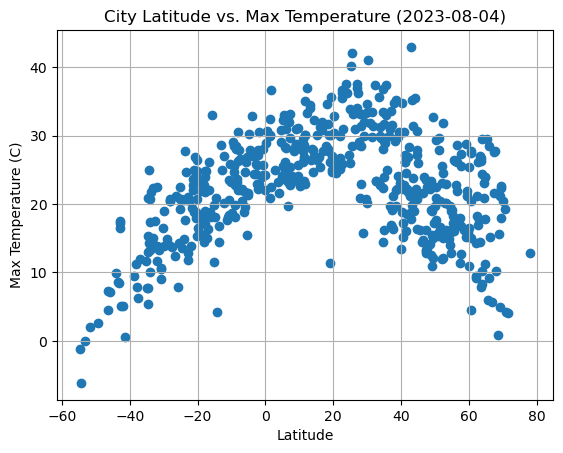

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (2023-08-04)")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

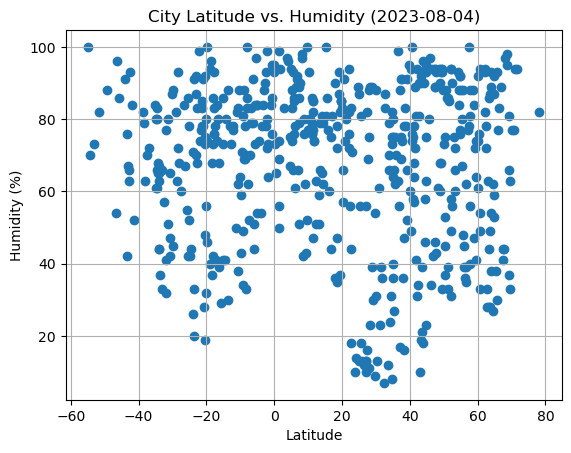

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2023-08-04)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

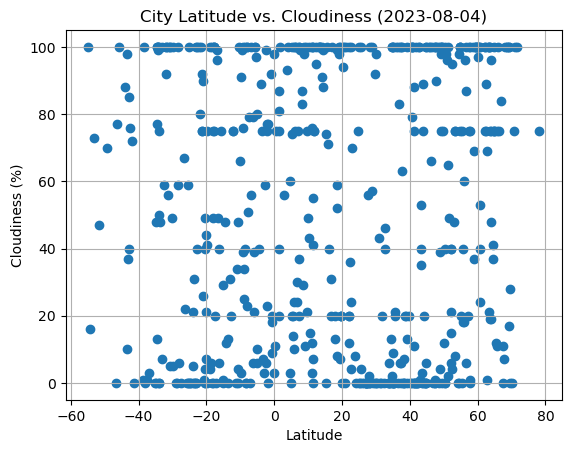

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2023-08-04)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

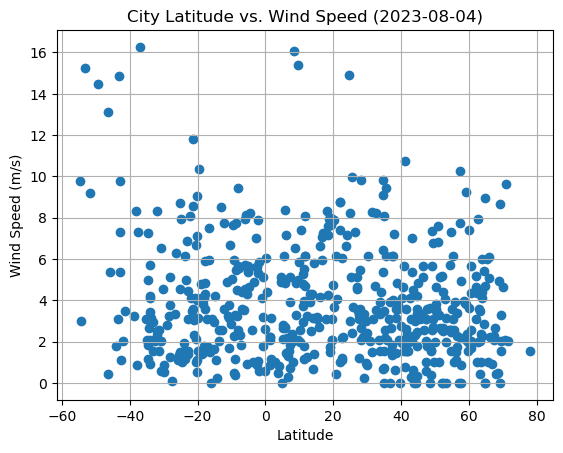

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2023-08-04)")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def linear_reg_plt(x_values,y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-",label="_nolegend_")
    return rvalue, line_eq

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,vorgashor,67.5833,63.9500,27.60,44,0,2.26,RU,1691131657
4,jamestown,42.0970,-79.2353,21.77,94,0,1.54,US,1691131618
5,farasan,16.7022,42.1183,30.84,75,20,7.09,SA,1691131658
6,iqaluit,63.7506,-68.5145,7.85,87,75,1.03,CA,1691131658
8,colonia,40.5746,-74.3021,22.23,76,100,4.63,US,1691131633


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto ayora,-0.7393,-90.3518,24.19,95,18,1.79,EC,1691131656
1,kani keli,-12.9536,45.1033,28.59,78,31,8.50,YT,1691131657
2,port-aux-francais,-49.3500,70.2167,2.58,88,70,14.48,TF,1691131657
7,tete,-16.1564,33.5867,18.05,68,40,0.00,MZ,1691131358
12,queenstown,-31.8976,26.8753,11.66,41,100,2.51,ZA,1691131659


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.54


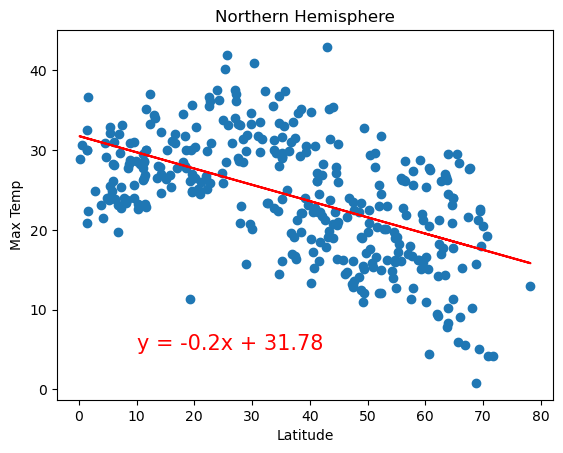

In [15]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
rvalue, line_eq = linear_reg_plt(x_values,y_values)

plt.title('Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

print(f"The r-value is: {round(rvalue,2)}")
plt.annotate(line_eq,(10,5),fontsize=15,color="red")
plt.show()

The r-value is: 0.76


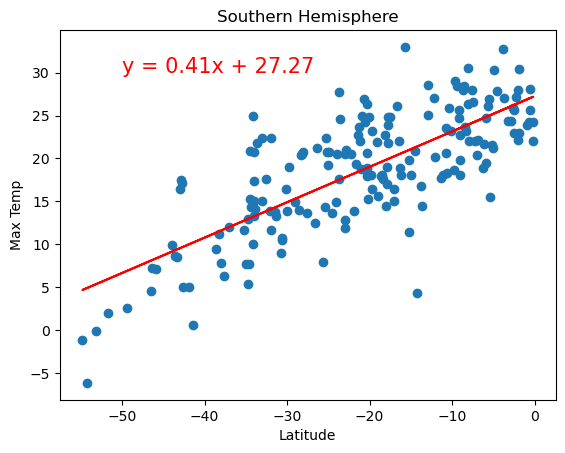

In [16]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
rvalue, line_eq = linear_reg_plt(x_values,y_values)

plt.title('Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

print(f"The r-value is: {round(rvalue,2)}")
plt.annotate(line_eq,(-50,30),fontsize=15,color="red")
plt.show()

**Discussion about the linear relationship:** Since r value is about -0.54 in the northern hemisphere, latitude and maximum temperature have moderate negative correlation. In the southern hemispheres, r value is about 0.76, so latitude and maximum temperature have relatively strong positive correlation. That is, the maximum temperature tends to decrease from the equator to the poles. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.06


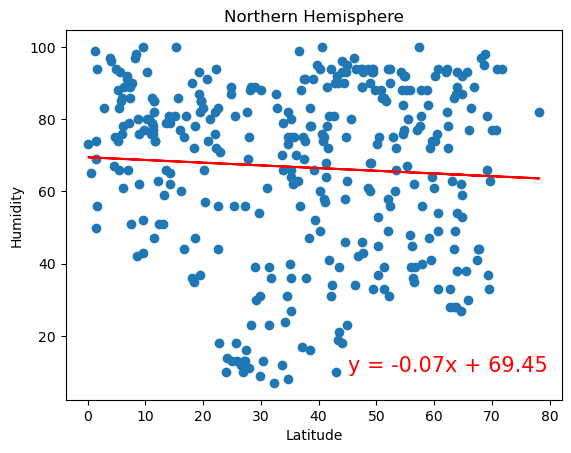

In [17]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
rvalue, line_eq = linear_reg_plt(x_values,y_values)

plt.title('Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Humidity')

print(f"The r-value is: {round(rvalue,2)}")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")
plt.show()

The r-value is: 0.09


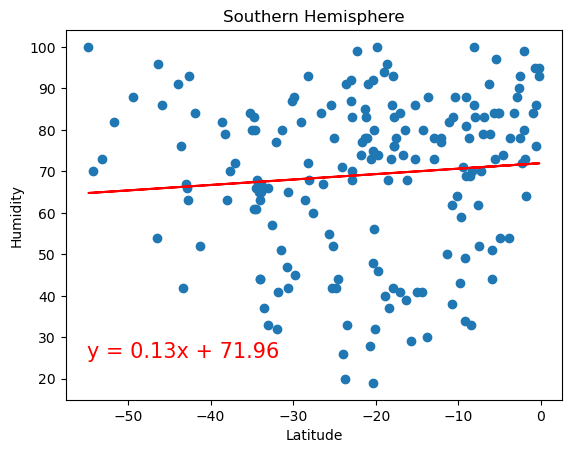

In [18]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
rvalue, line_eq = linear_reg_plt(x_values,y_values)

plt.title('Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Humidity')

print(f"The r-value is: {round(rvalue,2)}")
plt.annotate(line_eq,(-55,25),fontsize=15,color="red")
plt.show()

**Discussion about the linear relationship:** Since the value of r is close to zero in both the northern and southern hemispheres, it is reasonable to assume that there is no correlation between latitude and humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.04


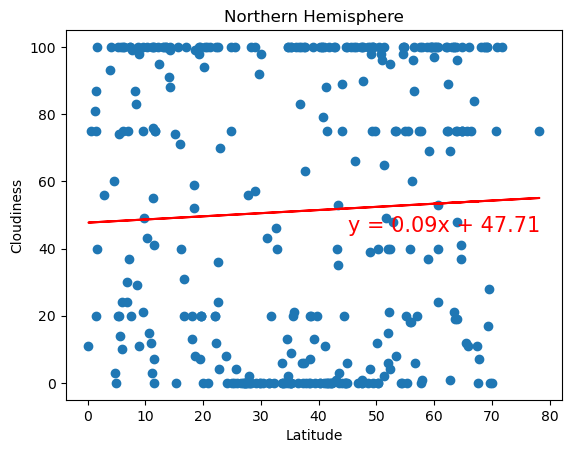

In [19]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
rvalue, line_eq = linear_reg_plt(x_values,y_values)

plt.title('Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

print(f"The r-value is: {round(rvalue,2)}")
plt.annotate(line_eq,(45,45),fontsize=15,color="red")
plt.show()

The r-value is: -0.06


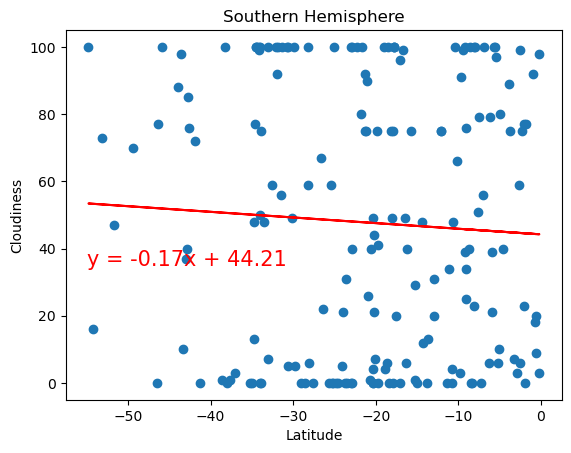

In [20]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
rvalue, line_eq = linear_reg_plt(x_values,y_values)

plt.title('Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

print(f"The r-value is: {round(rvalue,2)}")
plt.annotate(line_eq,(-55,35),fontsize=15,color="red")
plt.show()

**Discussion about the linear relationship:** In both the northern and southern hemispheres it is reasonable to assume that there is no correlation between latitude and cloudiness because the value of r is close to zero, respectively. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.13


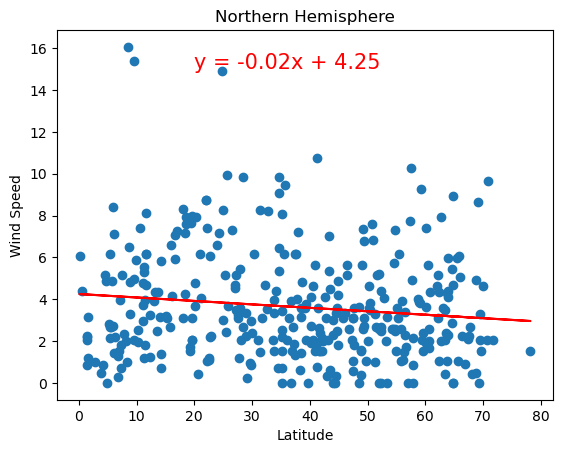

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
rvalue, line_eq = linear_reg_plt(x_values,y_values)

plt.title('Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

print(f"The r-value is: {round(rvalue,2)}")

plt.text(20, 15, line_eq, fontsize=15, color="red")
plt.show()

The r-value is: -0.17


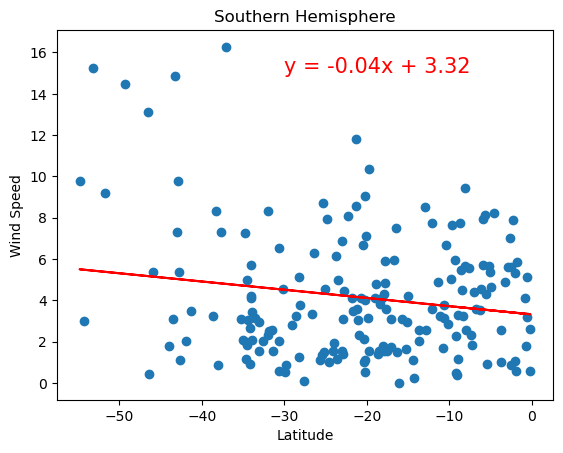

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
rvalue, line_eq = linear_reg_plt(x_values,y_values)

plt.title('Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

print(f"The r-value is: {round(rvalue,2)}")
plt.text(-30, 15, line_eq, fontsize=15, color="red")
plt.show()

**Discussion about the linear relationship:**  In both the northern and southern hemispheres, latitude and wind speed are weakly correlated because the absolute value of r is less than 0.2.